<h1>Seattle Airbnb Data Analysis

<h4>In this project, I will be analyzing Seattle AirBnB data using the Cross-Industry Process for Data Mining (CRISP-DM). This project is part of a Udacity Data Scientist for Enterprise Nanodegree Program.

<h2> 1. Business Understanding

In this project, I used the Seattle AirBnB data provided by Kaggle here (https://www.kaggle.com/airbnb/seattle).
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.
The following Airbnb activity is included in this Seattle dataset:
Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day
The data comes in the form of 3 different files: Calendar.csv, Listings.csv, and Reviews.csv. Based on the type of data I have, I will look to answer the following questions:

1. Which months are the busiest in Seattle? What is the correlation between month and price?
2. What is the feature of the neighbourhood?
3. How number of bedrooms affect the price of the listings?¶

<h2>2. Data Understanding

First I will gather and assess the data from my 3 files to see how each file could possibly help me answer my questions. To do this I will first import the necessary libraries that I will be using in this project.

In [3]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
rootpath = "C:\\Users\\usyangji\\OneDrive - NESTLE\\Documents\\Udacity\\Project1"

In [45]:
#Read all the datasets
calendar = pd.read_csv(rootpath + "\\calendar.csv")
listings = pd.read_csv(rootpath + "\\listings.csv")
reviews = pd.read_csv(rootpath + "\\reviews.csv")

Now that I have loaded my data into my notebook. Let's first take a quick look at the listings data to understand what it contains.

<h3> Listing

In [11]:
listings.shape #3818 listings in the dataset, 92 variables

(3818, 92)

In [14]:
listings.head()

,id,name,host_id,host_name,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,241032,Stylish Queen Anne Apartment,956883,Maija,f,1,Queen Anne,West Queen Anne,Queen Anne,98119,...,10.0,10.0,10.0,9.0,10.0,0,moderate,0,0,4.07
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,t,1,Queen Anne,West Queen Anne,Queen Anne,98119,...,10.0,10.0,10.0,10.0,10.0,0,strict,1,1,1.48
2,3308979,New Modern House-Amazing water view,16708587,Jill,f,1,Queen Anne,West Queen Anne,Queen Anne,98119,...,10.0,10.0,10.0,10.0,10.0,0,strict,0,0,1.15
4,278830,Charming craftsman 3 bdm house,1452570,Emily,f,1,Queen Anne,West Queen Anne,Queen Anne,98119,...,9.0,10.0,10.0,9.0,9.0,0,strict,0,0,0.89
5,5956968,Private unit in a 1920s mansion,326758,Andrew,f,1,Queen Anne,West Queen Anne,Queen Anne,98119,...,10.0,10.0,10.0,10.0,10.0,0,strict,0,0,2.45


In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2843 entries, 0 to 3814
Data columns (total 40 columns):
id                                  2843 non-null object
name                                2843 non-null object
host_id                             2843 non-null int64
host_name                           2843 non-null object
host_is_superhost                   2843 non-null object
host_identity_verified              2843 non-null int64
neighbourhood                       2843 non-null object
neighbourhood_cleansed              2843 non-null object
neighbourhood_group_cleansed        2843 non-null object
zipcode                             2843 non-null object
market                              2843 non-null object
latitude                            2843 non-null float64
longitude                           2843 non-null float64
property_type                       2843 non-null object
room_type                           2843 non-null object
accommodates                        28

I see that there are a lot of features in this dataset that could be useful for answering all kinds of questions! I wont need all of this data so I'll need to make sure to remove any columns that I may not help me answer my questions. I can certainly use some data points to answer my questions such as neighbourhoods that would be very useful for this project.

Next, let's look at the reviews and calendar datasets

In [17]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [18]:
reviews.shape

(84849, 6)

In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [21]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [22]:
calendar.shape

(1393570, 4)

In [23]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Based on a quick view of the above files, it looks like I will need to combine by data so I can be able to answer some of my questions to leverage the pieces of each dataset that may be relevant.

In my next step I will cleanse my data to have it prepared for use in later steps

<h2> 3. Data Preparation

<h4> Listing

Starting with the listings dataset, I will remove any unneeded columns first. Then I will prep the columns such as price so that it is represented properly as a number versus as a string - removing unwanted characters as well.

In [46]:
#change price type and remove $
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

#change necessary data types
listings[["id"]] = listings.id.astype('str')

#change t/f to 1/0
function = lambda x: 1 if x == 't' else 0 #create a function

for col in ["requires_license", "instant_bookable", "require_guest_profile_picture", "require_guest_phone_verification", "host_has_profile_pic", "host_identity_verified"]:
    listings[[col]] = listings[[col]].applymap(function)

#fill NA with 0
listings = listings.fillna(0)
    
#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
listings = listings[listings['bathrooms']>0]
listings = listings[listings['bedrooms'] > 0]
listings = listings[listings['beds'] > 0]
listings = listings[listings['price'] > 0]
listings = listings[listings['review_scores_rating']  > 0]
listings = listings[listings['reviews_per_month'] > 0]
listings = listings[listings['accommodates']  > 0]

listings[:5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,0,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,0,...,10.0,0,0.0,WASHINGTON,0,moderate,0,0,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,0,0.0,WASHINGTON,0,strict,1,1,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,0,0.0,WASHINGTON,0,strict,0,0,2,1.15
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,0,0.0,WASHINGTON,0,strict,0,0,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,0,0.0,WASHINGTON,0,strict,0,0,1,2.45


<h4> Calendar

For the calendar dataset, for date I will convert from string to date type. Also, since I want to know how prices may be throughout the year, I will also extract month from my date so that I can use it later in my analysis.

In [47]:
#extract month from date
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
#change price type to remove $
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
#change t/f to 1/0
calendar['available'].replace({'f': 0, 't': 1}, inplace=True)

In [48]:
#fill NA with 0
calendar = calendar.fillna(0)


calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,0.0,1
3,241032,2016-01-07,0,0.0,1
4,241032,2016-01-08,0,0.0,1


In [40]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null int64
price         1393570 non-null float64
month         1393570 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 53.2+ MB


<h4>Reviews

For the reviews data, the data is overall clean aside from a few null comments and a string type for date which I will convert to date type. I dont really need the comments in this project so I will drop the column with missing values.

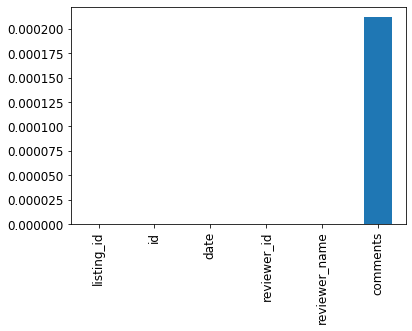

In [49]:
#get percenatage of missing values in reviews dataframe
%matplotlib inline
reviews.isnull().mean().plot.bar(figsize=(6,4), fontsize = 12);

In [50]:
#drop the rows with missing comments
reviews = reviews[reviews['comments'].notna()]
#add month
reviews['month'] = pd.DatetimeIndex(reviews['date']).month
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,8


<h2> 4. Analyze and Visualization

<h3>Question 1: Which months are the busiest in Seattle? What is the correlation between month and price?

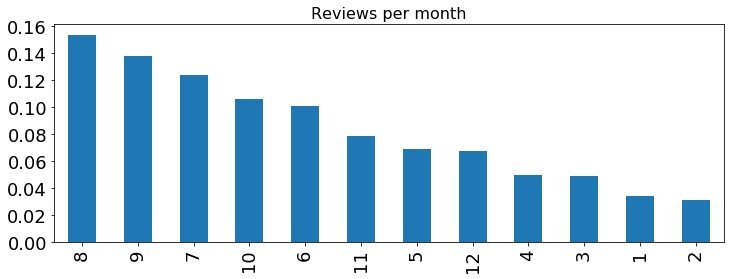

In [32]:
# number of reviews per month
reviews_per_month = reviews['month'].value_counts()
(reviews_per_month/reviews.shape[0]).plot(kind="bar", figsize=(12,4));
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Reviews per month", fontsize = 16);

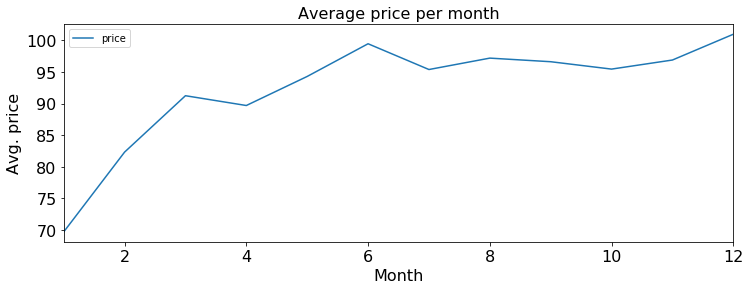

In [42]:
# to get the average prices by month, we group the average of the price by month
price_by_month = calendar.groupby('month', as_index=False)['price'].mean()
price_by_month.plot.line(x='month', y = 'price', figsize=(12,4));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Avg. price', fontsize = 16)
plt.title("Average price per month", fontsize = 16);

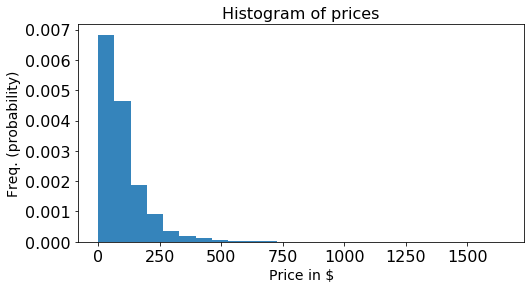

In [43]:
## Plot histogram of prices
bins=list(range(0, 10, 1700))
#print(bins)
ax = calendar['price'].plot.hist(by = 'price', bins=25, density=True, alpha=0.9, figsize=(8,4))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Price in $', fontsize = 14)
plt.ylabel('Freq. (probability)', fontsize = 14)
plt.title("Histogram of prices", fontsize = 16);

Based on the visual above, it looks like the first few months of the year experience lower prices with a quick spike in the summer where the average prices jump above 100 and then higher prices towards the end of the year. This could possibly relate to tourists preferring to travel during the summer/fall seasons and during the holidays which the hosts in Seattle certainly take advantage of.

<h3> Question 2: What is the feature of the neighbourhood?

In [73]:
#Only keep the necessary columns from listing
df = listings[['neighborhood_overview', 'neighbourhood_cleansed']]
df.head()

,neighborhood_overview,neighbourhood_cleansed
0,0,West Queen Anne
1,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne
2,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne
4,We are in the beautiful neighborhood of Queen ...,West Queen Anne
5,This part of Queen Anne has wonderful views an...,West Queen Anne


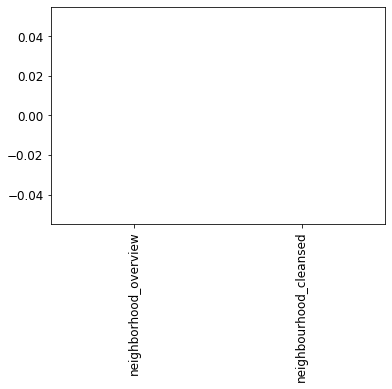

In [74]:
#get percenatage of missing values in the dataframe
%matplotlib inline
df.isnull().mean().plot.bar(figsize=(6,4), fontsize = 12);

In [75]:
#Let's drop the na in the dataframe for better analysis
df = df.dropna()
df.info()
df['neighborhood_overview'] = df['neighborhood_overview'] .astype(str)
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'] .astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2843 entries, 0 to 3814
Data columns (total 2 columns):
neighborhood_overview     2843 non-null object
neighbourhood_cleansed    2843 non-null object
dtypes: object(2)
memory usage: 66.6+ KB


In [76]:
## lets have a look at some random neighbourhood overviews
print('first overview:  ', df['neighborhood_overview'].values[0])
print('second overview:  ', df['neighborhood_overview'].values[100])
print('third overview:  ', df['neighborhood_overview'].values[500])

first overview:   0
second overview:   Ballard is the best. A new brewery opens monthly. Top-rated restaurants along Ballard Ave. Boutique shopping, vintage stores, you name it, Ballard has it. A movie theater, playgrounds in every direction, our amazing library with grass on the roof, even a pinball ice cream arcade. We're a short bike ride to the Locks and Golden Gardens (our beach) where you might be able to spot seals and an orca if you're lucky! And that's all just in Ballard--Seattle has so much to offer and we're little a 2 minute walk from the buses that can take you anywhere you want. 
third overview:   I love that it's a cozy neighborhood but still close to downtown. It's also situated for easy access to the University of Washington and Bellevue. Lots of cute restaurants and coffee shops within walking distance.


In [77]:
#Create description group by neighbourhood
overview = pd.DataFrame(columns = ['description', 'common_words']) # prepare the dataframe
overview['description'] = df.groupby('neighbourhood_cleansed', as_index=True)['neighborhood_overview'].sum()
overview['name'] = overview.index
overview.fillna('', inplace=True)
overview.head()

,description,common_words,name
neighbourhood_cleansed,,,
Adams,"Walk score: 90. Nuff said.Ballard is a quaint,...",,Adams
Alki,Alki Beach is an awesome place during the summ...,,Alki
Arbor Heights,This is a quiet neighborhood that has quick ac...,,Arbor Heights
Atlantic,Our Central District neighborhood is close to ...,,Atlantic
Belltown,0This neighborhood is AWESOME! We are: - 1 str...,,Belltown


We want to look at the feature of each neighbourhood and we need to create a function to get top bigrams of a text.

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
def get_top_n_bigram(corpus, n=None): 
    '''
    A function for getting top bigrams of a text
    It takes a text corpus and a number n as input
    Returns top n bi-grams of from corpus with frequency excluding stop words
    '''
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [80]:
#get top bigrams form neighbourhood_overview descriptions using the above function
for i in range(overview.shape[0]):
    common_words = get_top_n_bigram([overview['description'][i]], 5)
    for word, freq in common_words:
        overview['common_words'][i] = overview['common_words'][i] + word + '; '
        
overview.head()

,description,common_words,name
neighbourhood_cleansed,,,
Adams,"Walk score: 90. Nuff said.Ballard is a quaint,...",golden gardens; ballard locks; downtown seattl...,Adams
Alki,Alki Beach is an awesome place during the summ...,alki beach; tennis courts; west seattle; downt...,Alki
Arbor Heights,This is a quiet neighborhood that has quick ac...,quiet neighborhood; neighborhood quick; quick ...,Arbor Heights
Atlantic,Our Central District neighborhood is close to ...,capitol hill; international district; minutes ...,Atlantic
Belltown,0This neighborhood is AWESOME! We are: - 1 str...,pike place; place market; space needle; downto...,Belltown


In [81]:
print(" 'Adams' feature: ", overview['common_words'].loc[overview['name'] == 'Adams'].values[0])
print(" 'Arbor Heights' feature: ", overview['common_words'].loc[overview['name'] == 'Arbor Heights'].values[0])
print(" 'Industrial District' feature: ", overview['common_words'].loc[overview['name'] == 'Industrial District'].values[0])
print(" 'South Park' feature: ", overview['common_words'].loc[overview['name'] == 'South Park'].values[0])
print(" 'Broadway' feature: ", overview['common_words'].loc[overview['name'] == 'Broadway'].values[0])

 'Adams' feature:  golden gardens; ballard locks; downtown seattle; farmers market; gardens beach; 
 'Arbor Heights' feature:  quiet neighborhood; neighborhood quick; quick access; access downtown; downtown bus; 
 'Industrial District' feature:  experience seattle; seattle founded; founded explore; explore historic; historic district; 
 'South Park' feature:  oldest neighborhood; neighborhood lots; lots character; character south; south park; 
 'Broadway' feature:  capitol hill; minute walk; walking distance; volunteer park; coffee shops; 


By using this table, we can have a clear view of the feature of each neighbourhood. Fo people like coffee shops, they can just search coffee shop in this table and we can provide a list of neighbourhood that they can visit or stay at. For example, 'Broadway' neighbourhood is great for walking and coffee shops.

<h3> Question 3: How number of bedrooms affect the price of the listings?

In [82]:
#get the room type summary
roomtype=listings.groupby('room_type').id.count()
roomtype=roomtype.reset_index()
roomtype=roomtype.rename(columns={'id':'Count'})
roomtype

,room_type,Count
0,Entire home/apt,1805
1,Private room,947
2,Shared room,91


We can see that in total, 1805 is entire home/apt. So most people tend to rent out their entire place.

Text(0, 0.5, 'count of listings')

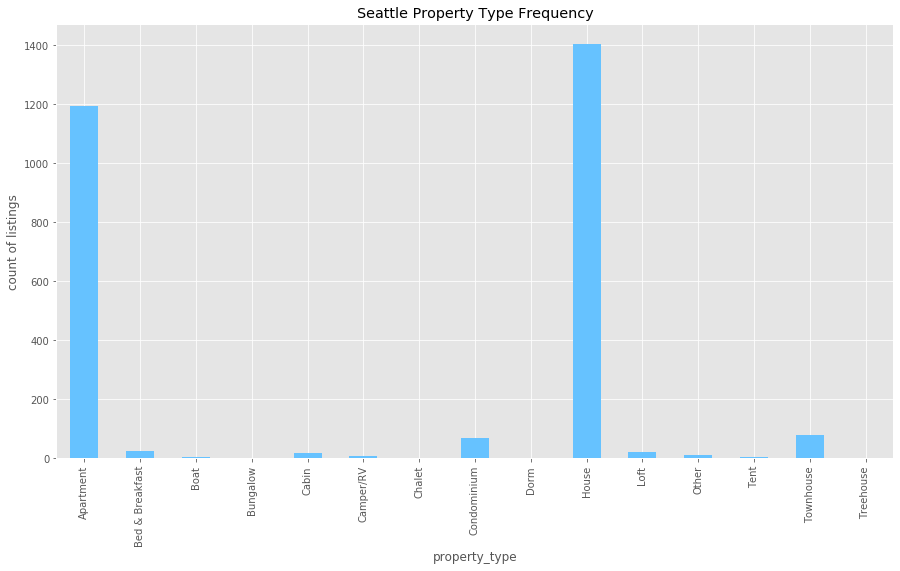

In [83]:
#take a look at property type frequency
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype = listings.groupby('property_type').id.count()
propertytype= propertytype.reset_index()
propertytype=propertytype.rename(columns={'id':'count of listings'})

objects = propertytype['property_type']
y_pos = propertytype['count of listings']

propertytype.plot(kind='bar', 
           x='property_type',
           y='count of listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Seattle Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('count of listings')

People are more inclined towards listing their entire property than listing private rooms or shared rooms.It can also be seen that property type also plays an important role.
Not surprisingly, Apartment and houses take up an overwhelming majority of all listings, although we do see few instances unfamiliar residencies here and there.

In [84]:
#now we take a look at the price
propertyprice = listings.groupby(['property_type','room_type']).price.mean()
propertyprice = propertyprice.reset_index()
propertyprice = propertyprice.sort_values('price',ascending=[0])
propertyprice.head()

,property_type,room_type,price
6,Boat,Entire home/apt,513.333333
19,House,Entire home/apt,194.824859
29,Townhouse,Entire home/apt,189.818182
22,Loft,Entire home/apt,178.933333
15,Condominium,Entire home/apt,170.490566


(15.5, -0.5)

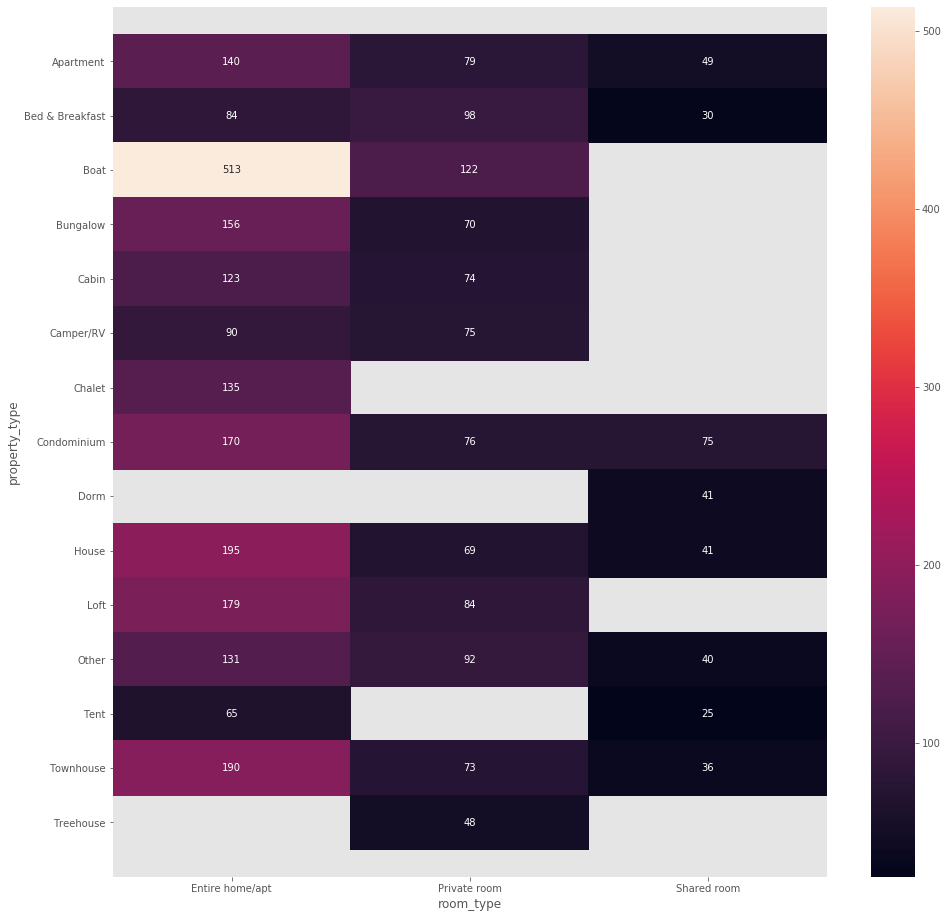

In [87]:
#Let's use a heatmap to see what property type and room type get the highest price in each neighbourhood
#Plotting the same on a heatMap

import seaborn as sns

plt.figure(figsize=(16,16))
ax = sns.heatmap(listings.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

This chart allows us to see all prices of listings broken down by property type and room type. This gives us much better understanding of the price breakdown in Seattle.
It can be analyzed that for almost all property type, prices for Entire home/apartment are the maximum.

(87.5, -0.5)

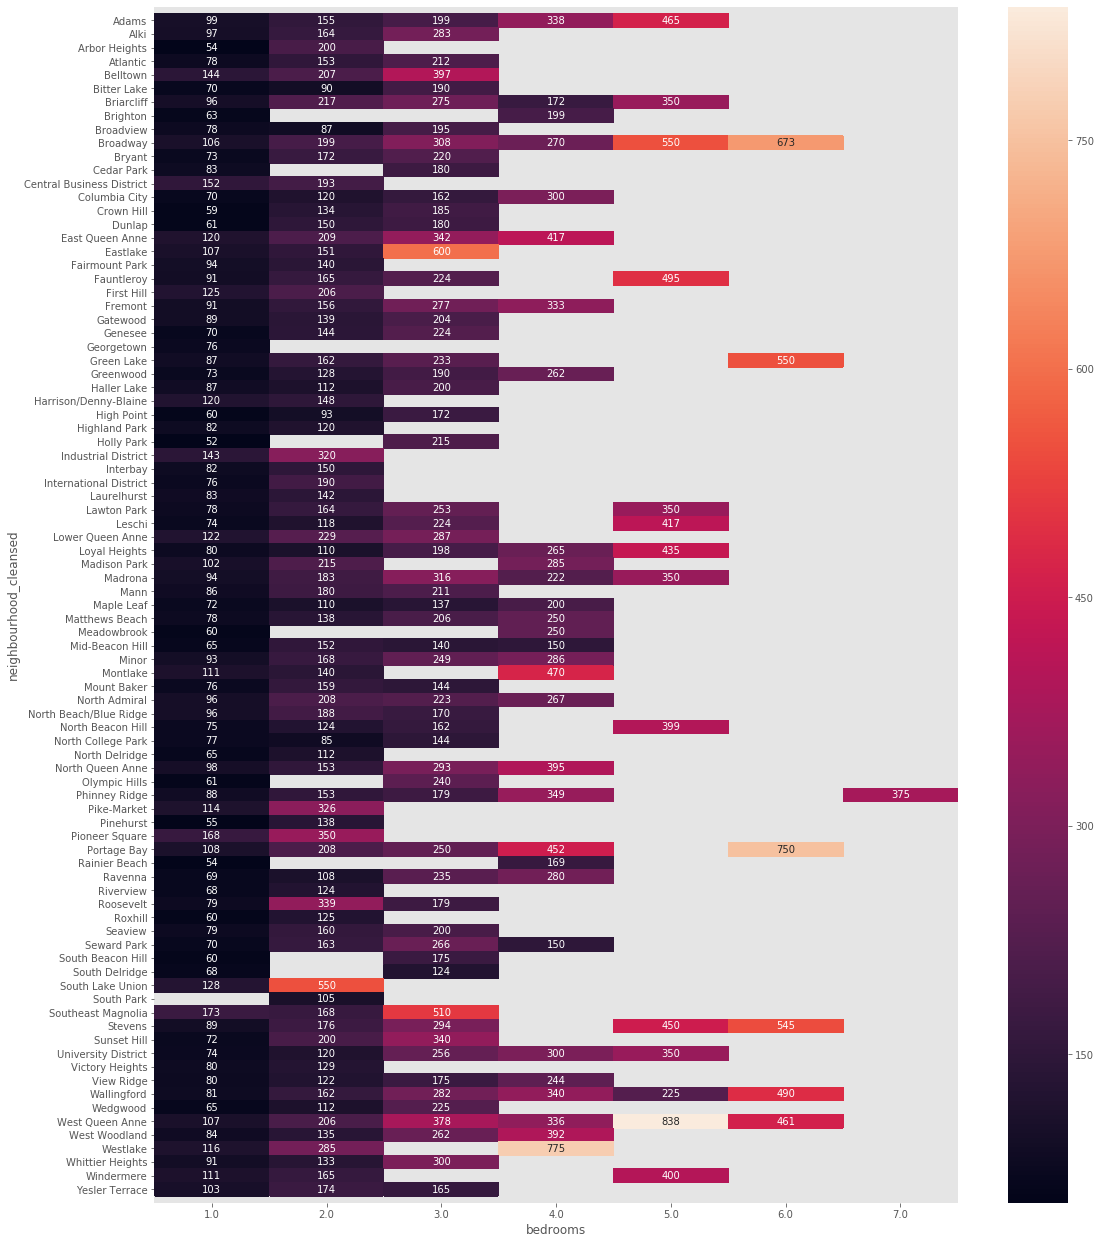

In [88]:
#Analysing how number of bedrooms affect the price of the listings
#HeatMap for variation of prices with number of bedrooms for listings
plt.figure(figsize=(18,22))
ax = sns.heatmap(listings.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

It can be analyzed that with the increase in the number of bedrooms price of listing increases. Although, it depends upon the neighbourhood as well.

So this analysis gives us data points that the prices of listings on Airbnb depends upon the room type, property type, number of bedrooms and neighbourhood.